In [19]:
import pandas as pd
import numpy as np
import sqlite3

#Rows returned
pd.set_option('display.max_rows', 9999)

con = sqlite3.connect("indeeds.db")
df = pd.read_sql_query("SELECT JOBSUMMARY from jobtable2", con)

print(df)

con.close()

                                            JOBSUMMARY
0    provide back-up support to help desk team. han...
1    designing & implementing technology solutions ...
2    tasks will include active participation in agi...
3    provide references for users by writing and ma...
4    the network administrator reports to a team le...
5    serve as the icims subject matter expert (sme)...
6    3-5+ years' of it support experience. experien...
7    recommend network and platform technology enha...
8    the ideal candidate will have recent experienc...
9    clearance level must be able to obtain: secret...
10   4+ years of information security consulting ac...
11   1+ years working in security information and/o...
12   threat analysts have opportunities for mentors...
13   the customer support engineer serves as a liai...
14   the it service desk technician provides techni...
15   experience in a help desk/call center environm...
16   10+ years of technology experience, preferably...
17   abili

In [20]:
#Analysis Begins
df.describe()

,JOBSUMMARY
count,630
unique,490
top,you’ll focus on managing the design and implem...
freq,16


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   JOBSUMMARY  630 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [22]:
#POS stands for parts of speech!

import nltk
from nltk.corpus import stopwords

#Convert Dataframe into a string
GetWords = df.to_string()

#Create a list of all words 
all_words=[]
WordsPOS = nltk.word_tokenize(GetWords)
all_words.extend(WordsPOS)

#puts the most frequent words into a dictionary called freq_dic
freq_dic=nltk.FreqDist(all_words)
print(freq_dic.most_common(10))

[(',', 904), ('and', 820), ('.', 519), ('to', 436), ('the', 407), ('of', 362), ('a', 243), ('with', 213), ('in', 198), ('for', 189)]


In [23]:
#Implement stopwords
stopwords=list(set(stopwords.words('english')))

punctuations = [',','.',"'",'"','?','!',";",'’',':','-','...','(',')','Sr.','Sr','I','II','%','&']              
for WordsPOS in stopwords+punctuations:
    if WordsPOS in freq_dic: # WIll take out punctuations and stopwords from most frequent counted words dictionary
        freq_dic.pop(WordsPOS)
print(freq_dic.most_common(50))
#input("Press Any Key to Proceed to POS Tagging")

[('technology', 167), ('experience', 124), ('information', 116), ('help', 115), ('product', 111), ('business', 90), ('technologies', 87), ('support', 82), ('security', 80), ('team', 74), ('users', 72), ('technical', 72), ('management', 59), ('new', 57), ('work', 53), ('systems', 53), ('data', 53), ('role', 51), ('design', 50), ('solutions', 48), ('software', 45), ('manager', 43), ('provide', 42), ('knowledge', 42), ('development', 42), ('client', 42), ("'s", 41), ('internal', 41), ('understanding', 41), ('and…', 39), ('years', 38), ('engineering', 37), ('teams', 37), ('including', 37), ('develop', 37), ('managing', 37), ('responsible', 36), ('within', 35), ('implementation', 35), ('services', 35), ('…', 33), ('customer', 33), ('ability', 33), ('project', 31), ('infrastructure', 29), ('tools', 29), ('cloud', 28), ('related', 28), ('application', 27), ('ensure', 27)]


In [24]:
#Test
GetWords

"                                                                                                                                                            JOBSUMMARY\n0                     provide back-up support to help desk team. hands-on experience in troubleshooting microsoft office 365 and microsoft windows with the end users.\n1             designing & implementing technology solutions for clients that will address their needs in network. onsite work implementing solutions will be required…\n2     tasks will include active participation in agile ceremonies, interviewing personnel, performing business and information technology process analysis, analyzing…\n3                                             provide references for users by writing and maintaining user documentation. provide application support and train users.\n4            the network administrator reports to a team lead and provides it field operations (itfo) support for 24x7 lans and associated applications, periph

In [25]:
nltk.help.brown_tagset()

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

In [26]:

#Takes the str dataframe a counts all of the diffrent parts of speech 
from collections import Counter
from nltk import FreqDist
import nltk

text = GetWords
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 4117, 'NNS': 1511, 'JJ': 1445, 'IN': 1366, 'CC': 928, ',': 904, 'DT': 815, 'VB': 764, 'CD': 726, '.': 525, 'VBG': 467, 'TO': 436, 'VBZ': 279, 'RB': 254, 'PRP': 229, 'VBP': 222, 'MD': 162, 'PRP$': 155, 'VBN': 125, ':': 87, 'VBD': 70, '(': 69, ')': 60, 'WDT': 52, 'POS': 47, '$': 29, 'JJS': 26, 'JJR': 21, 'WP': 21, 'NNP': 17, 'WRB': 17, 'RP': 8, 'EX': 5, 'RBS': 5, 'FW': 3, 'PDT': 1})


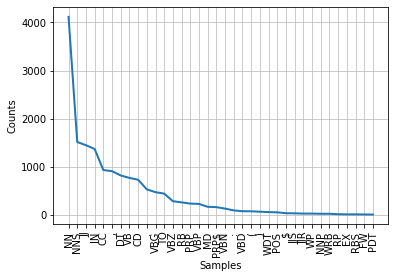

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
#Frequency distribution for POS
words = counts
fd2 = nltk.FreqDist(words)
fd2.plot()

In [28]:
#Returns most commons POS 
fd2.most_common(10)

[('NN', 4117),
 ('NNS', 1511),
 ('JJ', 1445),
 ('IN', 1366),
 ('CC', 928),
 (',', 904),
 ('DT', 815),
 ('VB', 764),
 ('CD', 726),
 ('.', 525)]

In [29]:
#Returns most commons words 
fd1.most_common(10)

[('technology', 167),
 ('experience', 124),
 ('information', 116),
 ('help', 115),
 ('product', 111),
 ('business', 90),
 ('technologies', 87),
 ('support', 82),
 ('security', 80),
 ('team', 74)]

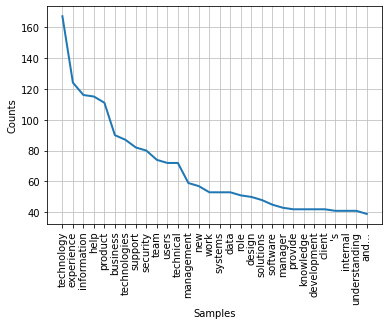

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
#Frequency distribution for the top 10 words
fd1 = freq_dic
fd1.plot(30)

In [31]:
#Bigrams combination of two words discovered multiple times in document
#Trigramscombinationof three words discovered multiple times in document

Tokens = nltk.word_tokenize(text)
bigrams = list(nltk.bigrams(Tokens))
trigrams = list(nltk.trigrams(Tokens))
bigrams

[('JOBSUMMARY', '0'),
 ('0', 'provide'),
 ('provide', 'back-up'),
 ('back-up', 'support'),
 ('support', 'to'),
 ('to', 'help'),
 ('help', 'desk'),
 ('desk', 'team'),
 ('team', '.'),
 ('.', 'hands-on'),
 ('hands-on', 'experience'),
 ('experience', 'in'),
 ('in', 'troubleshooting'),
 ('troubleshooting', 'microsoft'),
 ('microsoft', 'office'),
 ('office', '365'),
 ('365', 'and'),
 ('and', 'microsoft'),
 ('microsoft', 'windows'),
 ('windows', 'with'),
 ('with', 'the'),
 ('the', 'end'),
 ('end', 'users'),
 ('users', '.'),
 ('.', '1'),
 ('1', 'designing'),
 ('designing', '&'),
 ('&', 'implementing'),
 ('implementing', 'technology'),
 ('technology', 'solutions'),
 ('solutions', 'for'),
 ('for', 'clients'),
 ('clients', 'that'),
 ('that', 'will'),
 ('will', 'address'),
 ('address', 'their'),
 ('their', 'needs'),
 ('needs', 'in'),
 ('in', 'network'),
 ('network', '.'),
 ('.', 'onsite'),
 ('onsite', 'work'),
 ('work', 'implementing'),
 ('implementing', 'solutions'),
 ('solutions', 'will'),
 ('wi

In [32]:
trigrams

[('JOBSUMMARY', '0', 'provide'),
 ('0', 'provide', 'back-up'),
 ('provide', 'back-up', 'support'),
 ('back-up', 'support', 'to'),
 ('support', 'to', 'help'),
 ('to', 'help', 'desk'),
 ('help', 'desk', 'team'),
 ('desk', 'team', '.'),
 ('team', '.', 'hands-on'),
 ('.', 'hands-on', 'experience'),
 ('hands-on', 'experience', 'in'),
 ('experience', 'in', 'troubleshooting'),
 ('in', 'troubleshooting', 'microsoft'),
 ('troubleshooting', 'microsoft', 'office'),
 ('microsoft', 'office', '365'),
 ('office', '365', 'and'),
 ('365', 'and', 'microsoft'),
 ('and', 'microsoft', 'windows'),
 ('microsoft', 'windows', 'with'),
 ('windows', 'with', 'the'),
 ('with', 'the', 'end'),
 ('the', 'end', 'users'),
 ('end', 'users', '.'),
 ('users', '.', '1'),
 ('.', '1', 'designing'),
 ('1', 'designing', '&'),
 ('designing', '&', 'implementing'),
 ('&', 'implementing', 'technology'),
 ('implementing', 'technology', 'solutions'),
 ('technology', 'solutions', 'for'),
 ('solutions', 'for', 'clients'),
 ('for', 'cl

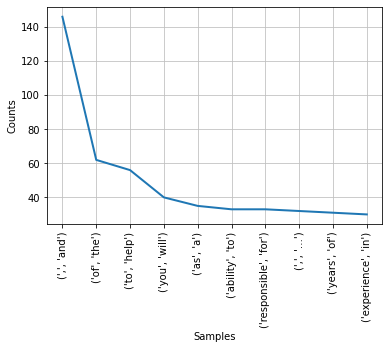

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
#Frequency distribution for the top 10 bigrams collected
fd = nltk.FreqDist(bigrams)
fd.plot(10)

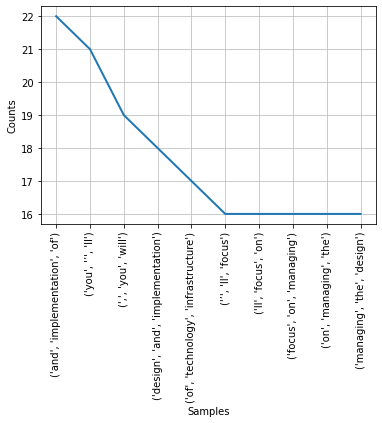

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
#Frequency distribution for the top 10 trigrams collected
fd = nltk.FreqDist(trigrams)
fd.plot(10)